**Interphase vs Mitosis Classification**

90 Nematode cells and 32,000 Jurkat cells

Differences in the rates of cellular division and differences in the amount of time spent in each stage of cellular division are important differentiators between healthy cells and cancer cells (Sherr 1996, Visconti 2016). Likewise, cancer cells often form erroneous mitotic structures during cellular division and these erroneous structures can contribute to further disease progression (Milunović-Jevtić 2016, Bakhoum 2018). As such, the study of cellular division and and its machinery has led to the development of numerous anti-cancer drugs (Florian 2016, Steinmetz 2018).  

Deep learning algorithms can be used to automate the time-consuming process of manually counting mitotic structures in breast histopathology images (Li 2018, Saha 2018).  Likewise, deep learning algorithms have been demonstrated as capable of identifying cell cycle stages during cellular division (Eulenberg 2017).

*Step 1: Import Modules*

In [1]:
!pip freeze > '../working/requirements.txt'

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from tqdm import tqdm
from glob import glob
import random
import cv2
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import scipy
import skimage
from skimage.transform import resize
import sklearn
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Using TensorFlow backend.


*Step 2: Explore Nematode Cell Data*

In [3]:
imageSize=75
path = "../input/nematode cells/nematode cells/"
def get_data(folder):
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['interphase']:
                label = 0
            elif folderName in ['mitosis']:
                label = 1             
            else:
                label = 2
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y
X2, y2= get_data(path)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2) 
y_trainHot2 = to_categorical(y_train2, num_classes = 2)
y_testHot2 = to_categorical(y_test2, num_classes = 2)

100%|██████████| 57/57 [00:00<00:00, 96.44it/s]


The min/max pixel values are already scaled between 0 and 1

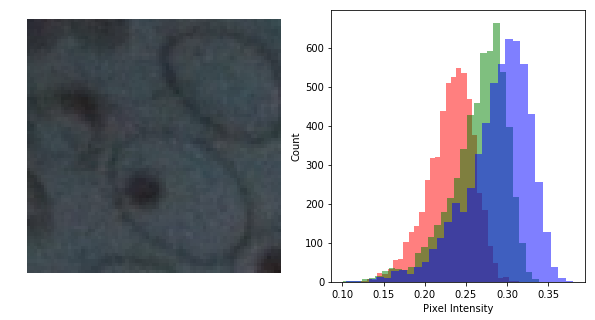

In [4]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
plotHistogram(X_train2[1])

20 images from category "Interphase"

Interphase


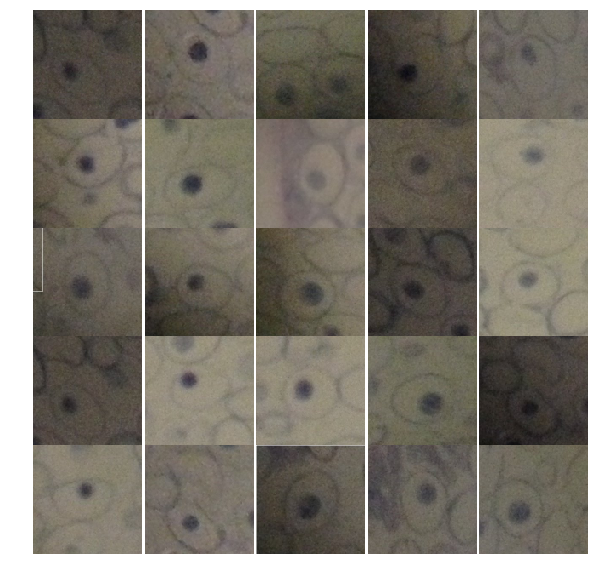

In [5]:
print("Interphase")
multipleImages = glob("../input/nematode cells/nematode cells/interphase/**")
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

20 images from category "Mitosis"

Mitosis


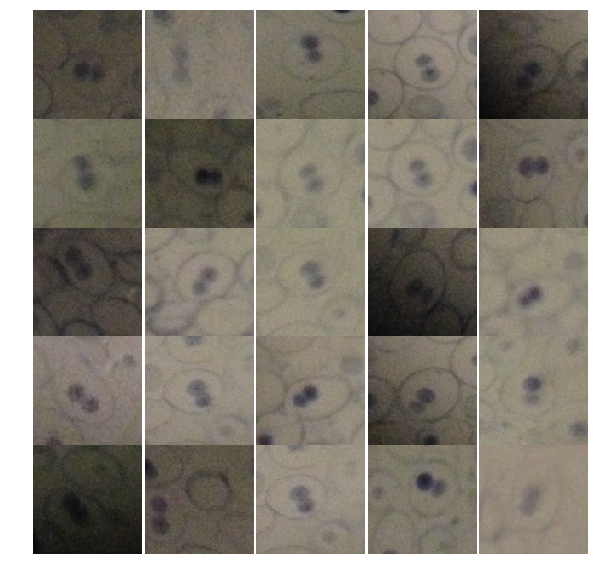

In [6]:
print("Mitosis")
multipleImages = glob("../input/nematode cells/nematode cells/mitosis/**")
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

Note class size imbalance

{0: 'Interphase', 1: 'Mitosis'}


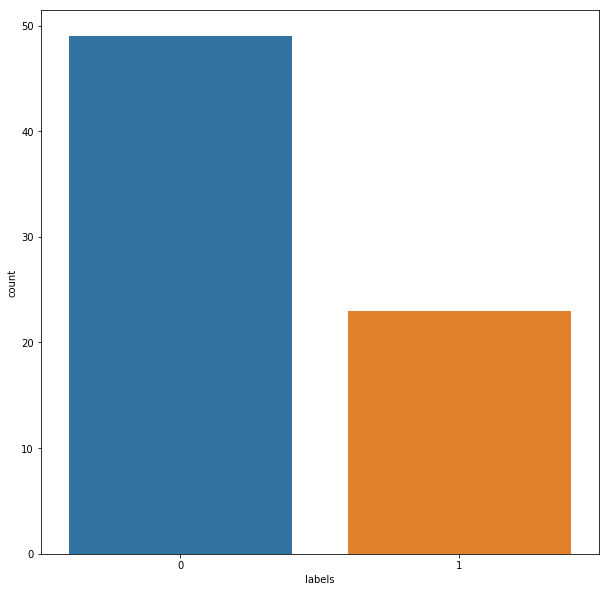

In [7]:
map_characters = {0: 'Interphase', 1: 'Mitosis'}
dict_characters=map_characters
df = pd.DataFrame()
df["labels"]=y_train2
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

*Step 3: Explore Jurkat Cell Data*

In [8]:
imageSize=75
path = "../input/jurkat cells (merged only)/jurkat cells (merged only)/"
def get_data(folder):
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['G1-G2-S']:
                label = 0
            elif folderName in ['Anaphase']:
                label = 1
            elif folderName in ['Metaphase']:
                label = 2
            elif folderName in ['Prophase']:
                label = 3                                
            elif folderName in ['Telophase']:
                label = 4                
            else:
                label = 5
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y
X, y= get_data(path)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_trainHot = to_categorical(y_train, num_classes = 5)
y_testHot = to_categorical(y_test, num_classes = 5)

100%|██████████| 15/15 [00:00<00:00, 313.80it/s]


The min/max pixel values are already scaled between 0 and 1

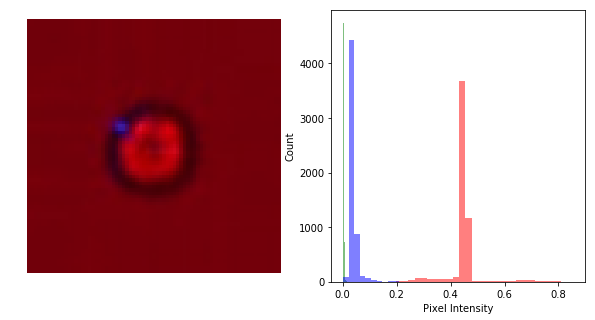

In [9]:
plotHistogram(X_train[1])

20 images from category "G1/G2/S"

Interphase


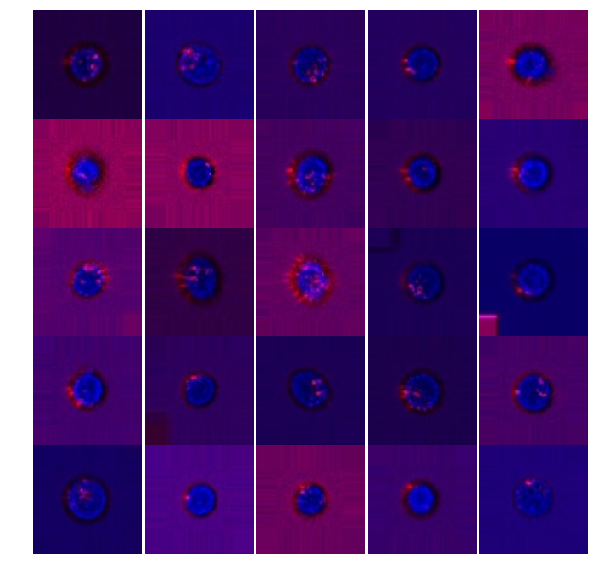

In [10]:
print("Interphase")
multipleImages = glob("../input/jurkat cells (merged only)/jurkat cells (merged only)/G1-G2-S/**")
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

20 images from category "Metaphase"

Mitosis


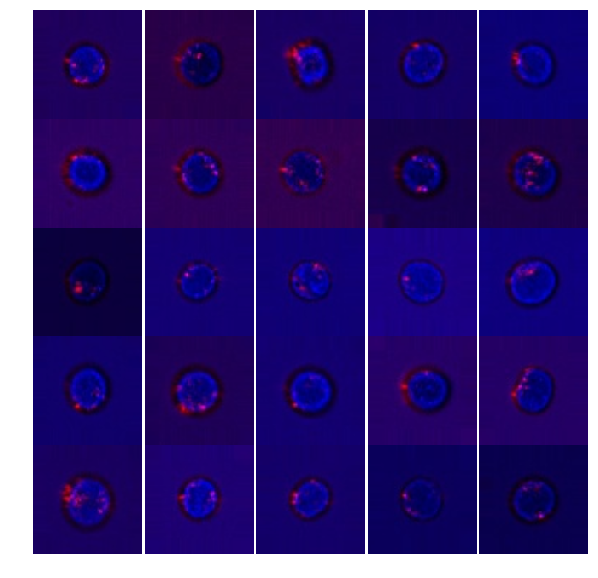

In [11]:
print("Mitosis")
multipleImages = glob('../input/jurkat cells (merged only)/jurkat cells (merged only)/Metaphase/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

Note class size imbalance

{0: 'G1/G2/S', 1: 'Anaphase', 2: 'Metaphase', 3: 'Prophase', 4: 'Telophase'}


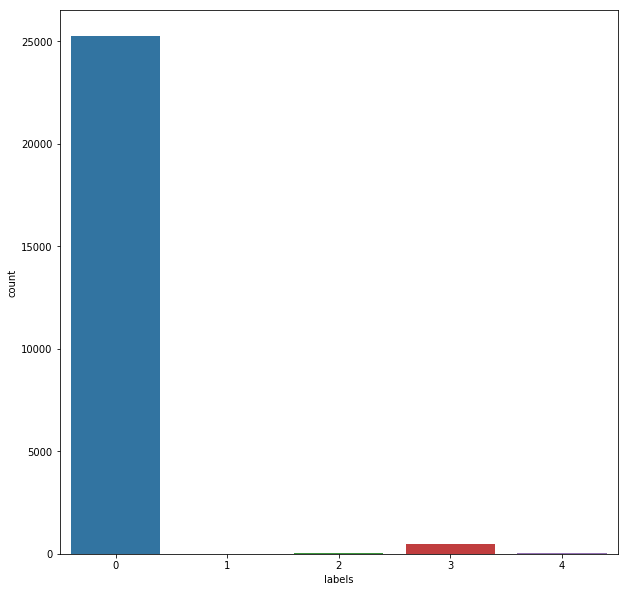

In [12]:
map_characters = {0: 'G1/G2/S', 1: 'Anaphase', 2: 'Metaphase',3:'Prophase',4:'Telophase'}
dict_characters=map_characters
df = pd.DataFrame()
df["labels"]=y_train
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

*Step 4: Build and Evaluate an ML Model using Fastai and the Jurkat Cell Data*

In [13]:
# dependencies for the fastai part of this kernel
# note that this half of the kernel is independent of the analysis performed above
# !pip install numpy==1.16.0
# !pip install pandas==0.23.4
# !pip install matplotlib==2.2.3
# !pip install torch==1.0.0
# !pip install fastai==1.0.39
X=[];y=[];X_train=[];y_train=[];X_test=[];y_test=[]

In [14]:
# adapted from lesson 1 of the fastai v1 course (see forums.fast.ai for more detail)
# turn on GPU and enable internet

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import torch
import fastai
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

print('numpy version: ',np.__version__)
print('pandas version: ',pd.__version__)
print('matplotlib version: ',matplotlib.__version__)
print('pytorch version: ',torch.__version__)
print('fastai version: ',fastai.__version__)

%reload_ext autoreload
%autoreload 2
%matplotlib inline

numpy version:  1.16.0
pandas version:  0.23.4
matplotlib version:  2.2.3
pytorch version:  1.0.0
fastai version:  1.0.39


Classes: 
 ['Anaphase', 'G1-G2-S', 'Metaphase', 'Prophase', 'Telophase']


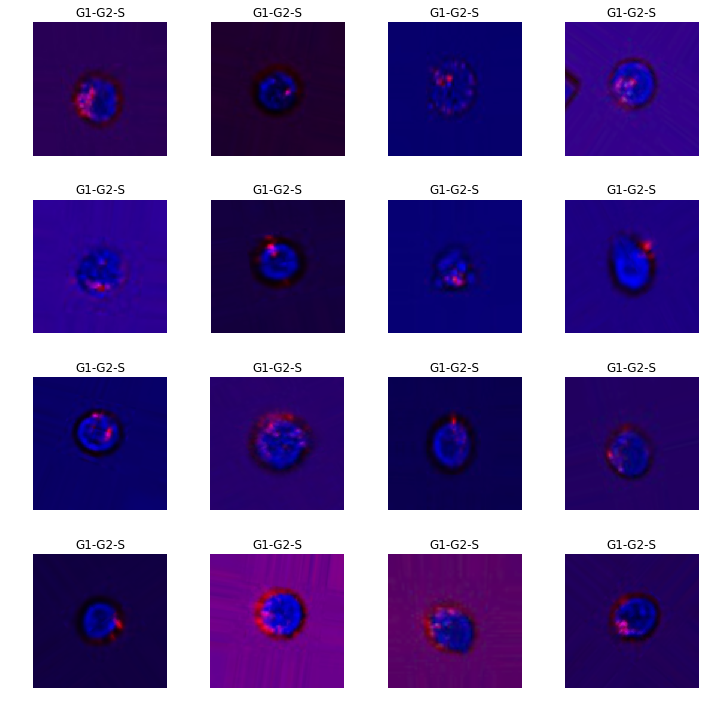

In [15]:
img_dir='../input/jurkat cells (merged only)/jurkat cells (merged only)/'
path=Path(img_dir)
data = ImageDataBunch.from_folder(path, train=".", 
                                  valid_pct=0.3,
                                  ds_tfms=get_transforms(do_flip=True,flip_vert=True, max_rotate=90,max_lighting=0.3),
                                  size=224,bs=64, 
                                  num_workers=0).normalize(imagenet_stats)
print(f'Classes: \n {data.classes}')
data.show_batch(rows=4, figsize=(10,10))

In [16]:
learn = create_cnn(data, models.resnet34, metrics=accuracy, model_dir="/tmp/model/")
learn.fit_one_cycle(10)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 85760093.90it/s]


epoch,train_loss,valid_loss,accuracy
1,0.260963,0.117193,0.977064
2,0.112198,0.109655,0.976960
3,0.089980,0.094347,0.976960
4,0.094610,0.080157,0.978613
5,0.087272,0.076611,0.978923
6,0.066295,0.085653,0.977374
7,0.090158,0.069612,0.981713
8,0.059832,0.076095,0.979337


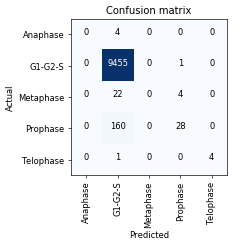

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=60)

**~97% accuracy using the default Fastai image classifier.**  Although the accuracy is very high it should also be noted that the dataset was highly imbalanced and there is room for improvement in terms of reducing bias and improving the precision and recall scores.

**Works Cited:**

Bakhoum SF, Cantley LC. The Multifaceted Role of Chromosomal Instability in Cancer and Its Microenvironment.  Cell. 2018 Vol 174(6): p1347-1360. https://www.ncbi.nlm.nih.gov/pubmed/30193109

Eulenberg P, Köhler N, et al. Reconstructing cell cycle and disease progression using deep learning. Nature Communications. 2017. Vol 8(1): p463. https://www.ncbi.nlm.nih.gov/pubmed/28878212.

Florian S, Mitchison TJ.  Anti-Microtubule Drugs.  Methods in Molecular Biology. 2016 Vol 1413: p403-411.  https://www.ncbi.nlm.nih.gov/pubmed/27193863

Li C, Wang X, Liu W, Latecki LJ.  DeepMitosis: Mitosis detection via deep detection, verification and segmentation networks.  Medical Image Analysis. 2018. Vol 45:
https://www.ncbi.nlm.nih.gov/pubmed/29455111

Milunović-Jevtić A, Mooney P, et al.  Centrosomal clustering contributes to chromosomal instability and cancer.  Current Opinion in Biotechnology. 2016 Vol 40: p113-118. https://www.ncbi.nlm.nih.gov/pubmed/27046071

Saha M, Chakraborty C, Racoceanu D.  Efficient deep learning model for mitosis detection using breast histopathology images.  Computational Medical Imaging and Graphics. 2018. Vol 64: p29-40. https://www.ncbi.nlm.nih.gov/pubmed/29409716

Sherr CJ.  Cancer cell cycles. Science. 1996. Vol 274(5293): p1672-7. https://www.ncbi.nlm.nih.gov/pubmed/8939849

Steinmetz MO, Prota AE.  Microtubule-Targeting Agents: Strategies To Hijack the Cytoskeleton. Trends in Cell Biology.  2018 Vol 28(10): p776-792 https://www.ncbi.nlm.nih.gov/pubmed/29871823

Visconti R, Monica RD, Grieco D. Cell cycle checkpoint in cancer: a therapeutically targetable double-edged sword. J Exp Clin Cancer Res. 2016. Vol 35: p153. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5037895/
